In [9]:
import scanpy as sc
import sys
import seaborn as sns
from matplotlib import pylab as plt
# import matplotlib.text
import os
import matplotlib.backends.backend_pdf as mpdf


sys.path.append("/oak/stanford/groups/smontgom/amarder/t21_download/Functions/")
direc="/oak/stanford/groups/smontgom/amarder/data/t21/ScanpyObjects"
headdir="/oak/stanford/groups/smontgom/amarder/t21-proj"
# Get the global settings
#from global_settings import global_settings
#global_settings()

# Get the bespoke analysis functions
# from scRNA_functions import scRNA_functions
# fc = scRNA_functions()

disease_status="Healthy"
sampletype="Liver"

print("OK.")



OK.


In [3]:
#######

fout="10X_" + disease_status + "_" + sampletype + ".umap.h5ad"
foutpath=headdir + "/out/data/" + fout
print("\n * Reading in data..." + foutpath)
adata=sc.read_h5ad(foutpath)

myColors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080',
            '#307D7E', '#000000', '#DDEFFF', '#000035', '#7B4F4B', '#A1C299', '#300018', '#C2FF99', '#0AA6D8', '#013349',
            '#00846F', '#8CD0FF', '#3B9700', '#04F757', '#C8A1A1', '#1E6E00', '#DFFB71', '#868E7E', '#513A01', '#CCAA35',
            '#800080', '#DAA520', '#1E90FF', '#3CB371', '#9370DB', '#8FBC8F', '#00FF7F', '#0000CD', '#556B2F', '#FF00FF',
            '#CD853F', '#6B8E23', '#008000', '#6495ED', '#00FF00', '#DC143C', '#FFFF00', '#00FFFF', '#FF4500', '#4169E1',
            '#48D1CC', '#191970', '#9ACD32', '#FFA500', '#00FA9A', '#2E8B57', '#40E0D0', '#D2691E', '#66CDAA', '#FFEFD5',
            '#20B2AA', '#FF0000', '#EEE8AA', '#BDB76B', '#E9967A', '#AFEEEE', '#000080', '#FF8C00', '#B22222', '#5F9EA0',
            '#ADFF2F', '#FFE4B5', '#7B68EE', '#7FFFD4', '#0000FF', '#BA55D3', '#90EE90', '#FFDAB9', '#6A5ACD', '#8B0000',
            '#8A2BE2', '#CD5C5C', '#F08080', '#228B22', '#FFD700', '#006400', '#98FB98', '#00CED1', '#00008B', '#9400D3',
            '#9932CC', '#4B0082', '#F0E68C', '#483D8B', '#008B8B', '#8B008B', '#4682B4']

# f, axs = plt.subplots(1,1,figsize=(20,16))
# sns.set(font_scale=1.5)
# sns.set_style("white")





 * Reading in data.../oak/stanford/groups/smontgom/amarder/t21-proj/out/data/10X_Healthy_Liver.umap.h5ad

 * Plotting UMAP.../oak/stanford/groups/smontgom/amarder/t21-proj/out/figures10X_Healthy_Liver.umap.pdf


In [199]:
os.chdir(headdir + "/out/figures")
fplotout="10X_"+disease_status+"_"+sampletype+".umap.pdf"
pdf = mpdf.PdfPages(fplotout)
print("\n * Plotting UMAP..." + headdir + "/out/figures/"+ fplotout)
f, axs = plt.subplots(1,1,figsize=(26,26))
sns.set(font_scale=2)
sns.set_style("white")
sc.pl.umap(adata, color="leiden", size=150, palette=myColors, components='1,2', ax=axs, show=True, use_raw=False, title=disease_status + ' ' + sampletype,legend_loc="on data")
# sc.pl.umap(adata, color="leiden_v7", size=150, palette=myColors, components='1,2', ax=axs, show=True, use_raw=False, title=disease_status + ' ' + sampletype,legend_loc="on data")
plt.tight_layout()
# plt.show(block=True)
pdf.savefig()
plt.close()
print("\n * Plot saved.")



 * Plotting UMAP.../oak/stanford/groups/smontgom/amarder/t21-proj/out/figures/10X_Healthy_Liver.umap.pdf

 * Plot saved.


In [203]:
markerDict= {'HSC/Progenitors' : ['CD34', 'SPINK2'],
    'Erythroid' : ['GATA1', 'KLF1'],
    'Mast cells' : ['HDC', 'CPA3'],
    'Megakaryocytes' : ['ITGA2B', 'GP9'],
    'Myeloid' :[ 'LYZ', 'SPI1'],
    'NK cells' : ['NKG7', 'GZMA'],
    'B cells' : ['CD79A', 'IGHM'],
    'Stroma' : ['ALB', 'AFP']}
adata.obs.columns

Index(['n_genes', 'patient', 'sample', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb',
       'organ', 'age', 'sorting', 'mean reads/cell', 'median genes/cell',
       'environment', '# isolated cells', '# estimated cells', 'sangerID',
       'batch', 'patient_sample', 'exp', 'n_counts', 'doublet_scores',
       'S_score', 'G2M_score', 'phase', 'PHASE', 'leiden', 'leiden_v1',
       'leiden_v2', 'leiden_v3', 'leiden_v4', 'leiden_v5', 'leiden_v5_split',
       'leiden_v6', 'leiden_v7_split', 'leiden_v7', 'annotations_atac',
       'annotations_atac_v2', 'cell_type_groups'],
      dtype='object')

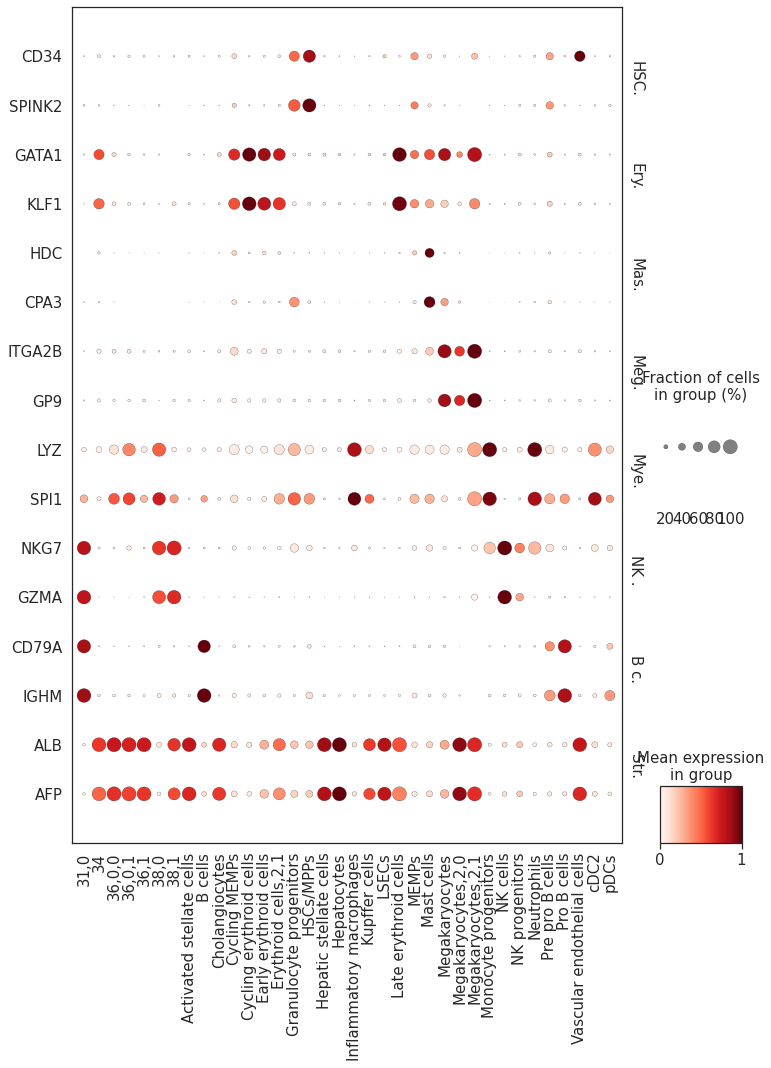

In [15]:
ax = sc.pl.dotplot(adata,
                   markerDict,
                   groupby="leiden_v7",
                   standard_scale='var',
                   smallest_dot=0.0,
                   dot_min=None,
                   dot_max=None,
                   color_map='Reds',
                   dendrogram=False,
                   figsize=(12,15),
                   show=True,
                   #save="{0}_Leiden_v1.png".format(name),
                   linewidths=2,swap_axes=True)


In [130]:
# adata.obs.columns
print((np.unique(adata.obs[["leiden_v7"]])))
'erythroid' in (np.unique(adata.obs[["leiden_v7"]]))
# re.search('erythroid',np.unique(adata.obs[["leiden_v7"]]))
stest='erythroid'
some_list=np.unique(adata.obs[["leiden_v7"]])
matching = [s for s in some_list if stest.upper() in s.upper()]
matching

['31,0' '34' '36,0,0' '36,0,1' '36,1' '38,0' '38,1'
 'Activated stellate cells' 'B cells' 'Cholangiocytes' 'Cycling MEMPs'
 'Cycling erythroid cells' 'Early erythroid cells' 'Erythroid cells,2,1'
 'Granulocyte progenitors' 'HSCs/MPPs' 'Hepatic stellate cells'
 'Hepatocytes' 'Inflammatory macrophages' 'Kupffer cells' 'LSECs'
 'Late erythroid cells' 'MEMPs' 'Mast cells' 'Megakaryocytes'
 'Megakaryocytes,2,0' 'Megakaryocytes,2,1' 'Monocyte progenitors'
 'NK cells' 'NK progenitors' 'Neutrophils' 'Pre pro B cells' 'Pro B cells'
 'Vascular endothelial cells' 'cDC2' 'pDCs']


['Cycling erythroid cells',
 'Early erythroid cells',
 'Erythroid cells,2,1',
 'Late erythroid cells']

In [129]:
import numpy as np
# print((np.unique(adata.obs[["leiden_v7"]])))
list_of_cell_types=np.unique(adata.obs[["leiden_v7"]])
celltypeDict={}
broad_cell_type="Erythroid"; old_cell_types="Erythroid"
celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Myeloid"; old_cell_types="Neutrophils"
celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Myeloid"; old_cell_types="Macrophages"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Myeloid"; old_cell_types="pDCs"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Myeloid"; old_cell_types="cDC2"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Myeloid"; old_cell_types="Kupffer"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Myeloid"; old_cell_types="Monocyte"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Myeloid"; old_cell_types="Osteoclasts"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="HSC/Progenitors"; old_cell_types="HSC"
celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="HSC/Progenitors"; old_cell_types="MPP"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="HSC/Progenitors"; old_cell_types="MEMP"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="HSC/Progenitors"; old_cell_types="Granulocyte"
celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="B cells"; old_cell_types="B cells"
celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Mast cells"; old_cell_types="Mast cells"
celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
broad_cell_type="Megakaryocytes"; old_cell_types="Megakaryocytes"
celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
if disease_status=="DownSyndrome" and sampletype=="Femur":
    broad_cell_type="NK/T cells"; old_cell_types="NK"
    celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
    broad_cell_type="NK/T cells"; old_cell_types="lymphoid"
    celltypeDict[broad_cell_type] += [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]
else:
    broad_cell_type="NK cells"; old_cell_types="NK"
    celltypeDict[broad_cell_type] = [s for s in list_of_cell_types if old_cell_types.upper() in s.upper()]

# print(list_of_cell_types)
list_of_used_cell_types=[]
for sublist in list(celltypeDict.values()):
    for item in sublist:
        list_of_used_cell_types.append(item)

list_of_not_used_cell_types=list(set(list_of_cell_types) - set(list_of_used_cell_types))

celltypeDict["Stroma"] = list_of_not_used_cell_types

print(celltypeDict)

{'Erythroid': ['Cycling erythroid cells', 'Early erythroid cells', 'Erythroid cells,2,1', 'Late erythroid cells'], 'Myeloid': ['Neutrophils', 'Inflammatory macrophages', 'pDCs', 'cDC2', 'Kupffer cells', 'Monocyte progenitors'], 'HSC/Progenitors': ['HSCs/MPPs', 'HSCs/MPPs', 'Cycling MEMPs', 'MEMPs', 'Granulocyte progenitors'], 'B cells': ['B cells', 'Pre pro B cells', 'Pro B cells'], 'Mast cells': ['Mast cells'], 'Megakaryocytes': ['Megakaryocytes', 'Megakaryocytes,2,0', 'Megakaryocytes,2,1'], 'NK cells': ['NK cells', 'NK progenitors'], 'Stroma': ['34', '36,0,0', '36,1', 'Cholangiocytes', '38,0', '38,1', '31,0', 'LSECs', 'Hepatic stellate cells', 'Vascular endothelial cells', 'Activated stellate cells', '36,0,1', 'Hepatocytes']}


In [153]:
adata.obs["cell_type_groups"] = np.nan
def create_cell_type_groups(row):
    word=row["leiden_v7"] 
    topiclist = [topic for topic in celltypeDict if word in celltypeDict[topic]]
    return(topiclist[0])

print("About to run create_cell_type_groups...")
adata.obs["cell_type_groups"] = adata.obs.apply(create_cell_type_groups, axis=1)
print("create_cell_type_groups running complete.")
# adata.obs.head()["leiden_v7"] in celltypeDict["Erythroid"]
# "Cycling erythroid cells" in celltypeDict["Erythroid"]

About to run create_cell_type_groups...
create_cell_type_groups running complete...



 * Plotting dotplot.../oak/stanford/groups/smontgom/amarder/t21-proj/out/figures/10X_Healthy_Liver.dotplot.pdf


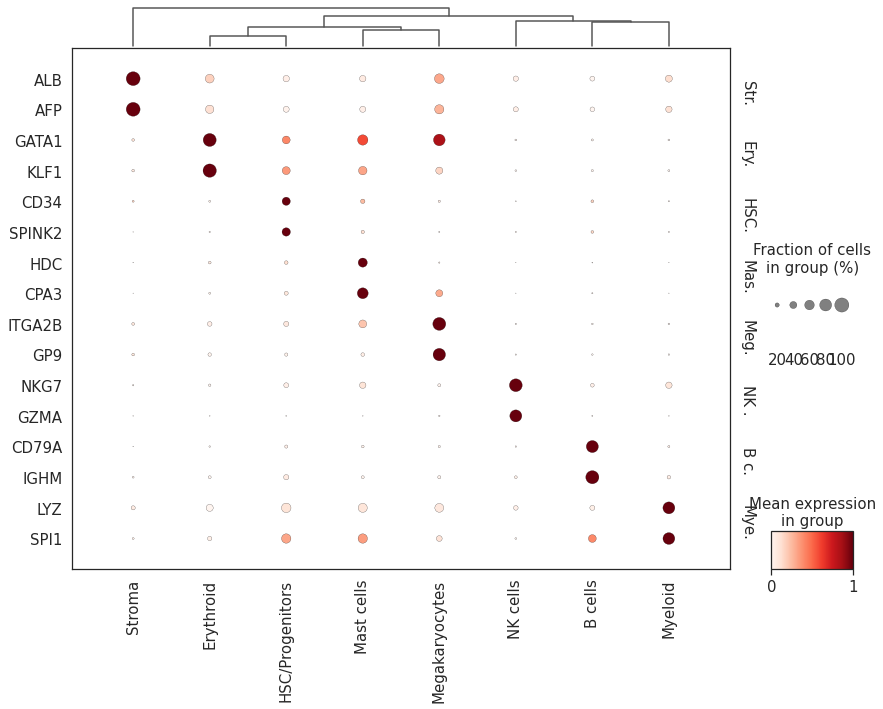


 * Plot saved.


In [194]:
# ax = sc.pl.dotplot(adata=adata,
#                    var_names=markerDict,
#                    groupby="cell_type_groups",
#                    standard_scale='var',
#                    smallest_dot=0.0,
#                    dot_min=None,
#                    dot_max=None,
#                    color_map='Reds',
#                    dendrogram=True,
#                    figsize=(14,10),
#                    show=True,
#                    #save="{0}_Leiden_v1.png".format(name),
#                    linewidths=2,swap_axes=True)

os.chdir(headdir + "/out/figures")
fplotout="10X_"+disease_status+"_"+sampletype+".dotplot.pdf"
# pdf = mpdf.PdfPages(fplotout)
print("\n * Plotting dotplot..." + headdir + "/out/figures/"+ fplotout)
# f, axs = plt.subplots(1,1,figsize=(14,10))
# print(ax)
sc.pl.DotPlot.DEFAULT_SAVE_PREFIX=""
import pathlib
sc._settings.ScanpyConfig.figdir=pathlib.Path(headdir + '/out/figures/')
new_plot=sc.pl.dotplot(adata=adata,
        var_names=markerDict,
        groupby="cell_type_groups",
        standard_scale='var',
        smallest_dot=0.0,
        dot_min=None,
        dot_max=None,
        color_map='Reds',
        dendrogram=True,
        figsize=(14,10),
        show=True,
        save=fplotout,
#         show=True,
#         save=fplotout,
        linewidths=2,
        swap_axes=True)
# f, axs = plt.subplots(1,1,figsize=(14,10))
# new_plot.savefig("{0}/out/figures/{1}".format(headdir,fplotout))
# plt.tight_layout()
# plt.show(block=True)
# pdf.savefig()
# plt.close()
print("\n * Plot saved.")



In [214]:
import pandas as pd
pd.set_option('display.max_rows', None)
print(adata.obs[["leiden","leiden_v7","cell_type_groups"]].drop_duplicates().sort_values("leiden").to_string(index=False))
pd.set_option('display.max_rows', 10)
print("Done")

leiden                   leiden_v7 cell_type_groups
     0                 Hepatocytes           Stroma
     1                 Hepatocytes           Stroma
     2                 Hepatocytes           Stroma
     3                 Hepatocytes           Stroma
     4                     B cells          B cells
     4                 Pro B cells          B cells
     5                       LSECs           Stroma
     6                    NK cells         NK cells
     7                        cDC2          Myeloid
     8                 Hepatocytes           Stroma
     9               Kupffer cells          Myeloid
    10     Cycling erythroid cells        Erythroid
    11       Early erythroid cells        Erythroid
    11             Pre pro B cells          B cells
    11                  Mast cells       Mast cells
    11               Cycling MEMPs  HSC/Progenitors
    11                       MEMPs  HSC/Progenitors
    12                 Neutrophils          Myeloid
    12      